# Capstone Project - Car Accident Severity 

In [55]:
import itertools
import pandas as pd
import matplotlib as mtpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import NullFormatter
%matplotlib inline


In [56]:
file_name='https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
df=pd.read_csv(file_name)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [57]:
print(df.dtypes)


SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [58]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [7]:
df.describe()


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [8]:
df['ROADCOND'].value_counts().to_frame()

,ROADCOND
Dry,124510
Wet,47474
Unknown,15078
Ice,1209
Snow/Slush,1004
Other,132
Standing Water,115
Sand/Mud/Dirt,75
Oil,64


In [9]:
df['LIGHTCOND'].value_counts().to_frame()

,LIGHTCOND
Daylight,116137
Dark - Street Lights On,48507
Unknown,13473
Dusk,5902
Dawn,2502
Dark - No Street Lights,1537
Dark - Street Lights Off,1199
Other,235
Dark - Unknown Lighting,11


In [10]:
df['STATUS'].value_counts().to_frame()

,STATUS
Matched,189786
Unmatched,4887


In [11]:
df['WEATHER'].value_counts().to_frame()


,WEATHER
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


In [12]:
df['ADDRTYPE'].value_counts().to_frame()

,ADDRTYPE
Block,126926
Intersection,65070
Alley,751


In [59]:
df['SPEEDING'].value_counts().to_frame()

,SPEEDING
Y,9333


In [13]:
df['UNDERINFL'].value_counts().to_frame()

,UNDERINFL
N,100274
0,80394
Y,5126
1,3995


In [14]:
df['COLLISIONTYPE'].value_counts().to_frame()

,COLLISIONTYPE
Parked Car,47987
Angles,34674
Rear Ended,34090
Other,23703
Sideswipe,18609
Left Turn,13703
Pedestrian,6608
Cycles,5415
Right Turn,2956
Head On,2024


In [19]:
print ('Matplotlib version: ', mtpl.__version__)



Matplotlib version:  3.0.2


In [22]:
df_WEATHER=df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)
df_WEATHER

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1               0.732143
                          2               0.267857
Clear                     1               0.677509
                          2               0.322491
Fog/Smog/Smoke            1               0.671353
                          2               0.328647
Other                     1               0.860577
                          2               0.139423
Overcast                  1               0.684456
                          2               0.315544
Partly Cloudy             2               0.600000
                          1               0.400000
Raining                   1               0.662815
                          2               0.337185
Severe Crosswind          1               0.720000
                          2               0.280000
Sleet/Hail/Freezing Rain  1               0.752212
                          2               0.247788
Snowing                   1               0

In [23]:
df_ROADCOND=df.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)
df_ROADCOND

ROADCOND        SEVERITYCODE
Dry             1               0.678227
                2               0.321773
Ice             1               0.774194
                2               0.225806
Oil             1               0.625000
                2               0.375000
Other           1               0.674242
                2               0.325758
Sand/Mud/Dirt   1               0.693333
                2               0.306667
Snow/Slush      1               0.833665
                2               0.166335
Standing Water  1               0.739130
                2               0.260870
Unknown         1               0.950325
                2               0.049675
Wet             1               0.668134
                2               0.331866
Name: SEVERITYCODE, dtype: float64

In [25]:
df_LIGHTCOND=df.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True)
df_LIGHTCOND

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1               0.782694
                          2               0.217306
Dark - Street Lights Off  1               0.736447
                          2               0.263553
Dark - Street Lights On   1               0.701589
                          2               0.298411
Dark - Unknown Lighting   1               0.636364
                          2               0.363636
Dawn                      1               0.670663
                          2               0.329337
Daylight                  1               0.668116
                          2               0.331884
Dusk                      1               0.670620
                          2               0.329380
Other                     1               0.778723
                          2               0.221277
Unknown                   1               0.955095
                          2               0.044905
Name: SEVERITYCODE, dtype: float64

In [26]:
df_STATUS=df.groupby(['STATUS'])['SEVERITYCODE'].value_counts(normalize=True)
df_STATUS

STATUS     SEVERITYCODE
Matched    1               0.698824
           2               0.301176
Unmatched  1               0.789441
           2               0.210559
Name: SEVERITYCODE, dtype: float64

In [27]:
df_ADDRTYPE=df.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts(normalize=True)
df_ADDRTYPE

ADDRTYPE      SEVERITYCODE
Alley         1               0.890812
              2               0.109188
Block         1               0.762885
              2               0.237115
Intersection  1               0.572476
              2               0.427524
Name: SEVERITYCODE, dtype: float64

In [31]:
df_SPEEDING= df.groupby(['SPEEDING'])['SEVERITYCODE'].value_counts(normalize=True)
df_SPEEDING 

SPEEDING  SEVERITYCODE
Y         1               0.621665
          2               0.378335
Name: SEVERITYCODE, dtype: float64

In [28]:
df_UNDERINFL=df.groupby(['UNDERINFL'])['SEVERITYCODE'].value_counts(normalize=True)
df_UNDERINFL

UNDERINFL  SEVERITYCODE
0          1               0.717628
           2               0.282372
1          1               0.593742
           2               0.406258
N          1               0.691884
           2               0.308116
Y          1               0.621732
           2               0.378268
Name: SEVERITYCODE, dtype: float64

In [96]:
df['UNDERINFL'].replace(to_replace=['0','N','1','Y'], value=[0,0,1,1], inplace=True)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,1,Intersection,37475.0,...,3.0,2.0,NaN,NaN,0,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,1,Block,NaN,...,3.0,0.0,NaN,6354039.0,0,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,1,Block,NaN,...,0.0,2.0,NaN,4323031.0,0,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,1,Block,NaN,...,0.0,2.0,NaN,NaN,0,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,1,Intersection,34387.0,...,3.0,2.0,NaN,4028032.0,0,10,Entering at angle,0,0,N


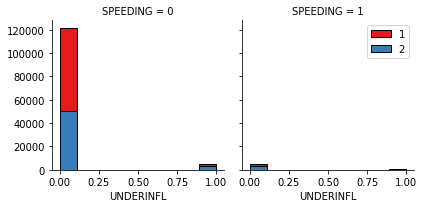

In [97]:
bins = np.linspace(df.UNDERINFL.min(), df.UNDERINFL.max(), 10)
g = sns.FacetGrid(df, col="SPEEDING", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'UNDERINFL', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [32]:
print("number of NaN values for the column SPEEDING :", df['SPEEDING'].isnull().sum())


number of NaN values for the column SPEEDING : 185340


In [38]:
df['SPEEDING'].value_counts().to_frame()

,SPEEDING
Y,9333


In [35]:
df.shape

(194673, 38)

In [37]:
print(194673-185340)


9333


In [127]:
df['ADDRTYPE'].replace(to_replace=['Alley','Block','Intersection'], value=[0,1,2], inplace=True)
df.head()


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,1,2,37475.0,...,3.0,2.0,NaN,NaN,0,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,1,1,NaN,...,3.0,0.0,NaN,6354039.0,0,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,1,1,NaN,...,0.0,2.0,NaN,4323031.0,0,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,1,1,NaN,...,0.0,2.0,NaN,NaN,0,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,1,2,34387.0,...,3.0,2.0,NaN,4028032.0,0,10,Entering at angle,0,0,N


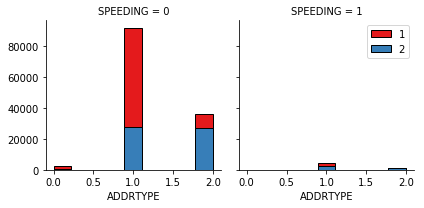

In [128]:
bins = np.linspace(df.ADDRTYPE.min(), df.ADDRTYPE.max(), 10)
g = sns.FacetGrid(df, col="SPEEDING", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADDRTYPE', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [146]:

df['SPEEDING'].replace(to_replace=['Y','NaN'], value=[1,0],inplace=True)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,1,2,37475.0,...,3.0,2.0,NaN,NaN,0,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,1,1,NaN,...,3.0,0.0,NaN,6354039.0,0,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,1,1,NaN,...,0.0,2.0,NaN,4323031.0,0,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,1,1,NaN,...,0.0,2.0,NaN,NaN,0,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,1,2,34387.0,...,3.0,2.0,NaN,4028032.0,0,10,Entering at angle,0,0,N


In [147]:
df['SPEEDING'].value_counts().to_frame()

,SPEEDING
0,185340
1,9333


In [92]:
df['STATUS'].replace(to_replace=['Matched','Unmatched'], value=[1,0], inplace=True)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,1,Intersection,37475.0,...,3.0,2.0,NaN,NaN,0,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,1,Block,NaN,...,3.0,0.0,NaN,6354039.0,0,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,1,Block,NaN,...,0.0,2.0,NaN,4323031.0,0,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,1,Block,NaN,...,0.0,2.0,NaN,NaN,0,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,1,Intersection,34387.0,...,3.0,2.0,NaN,4028032.0,0,10,Entering at angle,0,0,N


In [67]:
dz=pd.concat([df,pd.get_dummies(df['ADDRTYPE'])], axis=1)

dz.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,Alley,Block,Intersection
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,NaN,NaN,10,Entering at angle,0,0,N,0,0,1
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N,0,1,0
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,4323031.0,NaN,32,One parked--one moving,0,0,N,0,1,0
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,NaN,NaN,23,From same direction - all others,0,0,N,0,1,0
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,4028032.0,NaN,10,Entering at angle,0,0,N,0,0,1


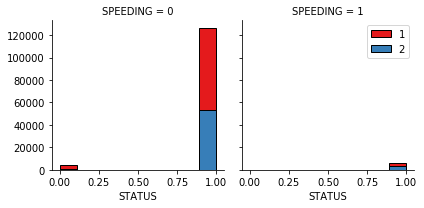

In [93]:
bins = np.linspace(df.STATUS.min(), df.STATUS.max(), 10)
g = sns.FacetGrid(df, col="SPEEDING", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'STATUS', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [74]:
df['ROADCOND'].replace(to_replace=['Dry','Ice','Oil','Wet','Sand/Mud/Dirt','Snow/Slush','Standing Water','Unknown','Other'], value=[0,1,2,3,4,5,6,7,8], inplace=True)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,3.0,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,3.0,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,0.0,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,0.0,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,3.0,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


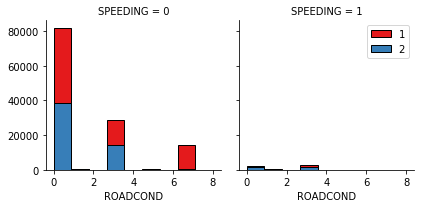

In [85]:
bins = np.linspace(df.ROADCOND.min(), df.ROADCOND.max(), 10)
g = sns.FacetGrid(df, col="SPEEDING", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ROADCOND', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [76]:
df['SPEEDING'].replace(np.nan,'0', inplace=True)

In [77]:
df['SPEEDING'].value_counts().to_frame()

,SPEEDING
0,185340
1,9333


In [80]:
df['LIGHTCOND'].replace(to_replace=['Dark - No Street Lights','Dark - Street Lights Off','Dark - Street Lights On','Dark - Unknown Lighting','Dawn','Daylight','Dusk','Unknown','Other'], value=[0,0,0,0,1,2,3,4,5], inplace=True)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,3.0,2.0,NaN,NaN,0,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,3.0,0.0,NaN,6354039.0,0,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,0.0,2.0,NaN,4323031.0,0,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,0.0,2.0,NaN,NaN,0,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,3.0,2.0,NaN,4028032.0,0,10,Entering at angle,0,0,N


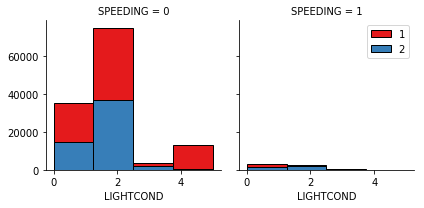

In [82]:
bins = np.linspace(df.LIGHTCOND.min(), df.LIGHTCOND.max(), 5)
g = sns.FacetGrid(df, col="SPEEDING", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'LIGHTCOND', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [86]:
df['WEATHER'].replace(to_replace=['Blowing Sand/Dirt','Clear','Fog/Smog/Smoke','Overcast','Partly Cloudy','Raining','Severe Crosswind','Sleet/Hail/Freezing Rain','Snowing', 'Unknown','Other'], value=[0,5,0,4,4,3,2,3,1,6,6], inplace=True)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,3.0,2.0,NaN,NaN,0,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,3.0,0.0,NaN,6354039.0,0,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,0.0,2.0,NaN,4323031.0,0,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,0.0,2.0,NaN,NaN,0,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,3.0,2.0,NaN,4028032.0,0,10,Entering at angle,0,0,N


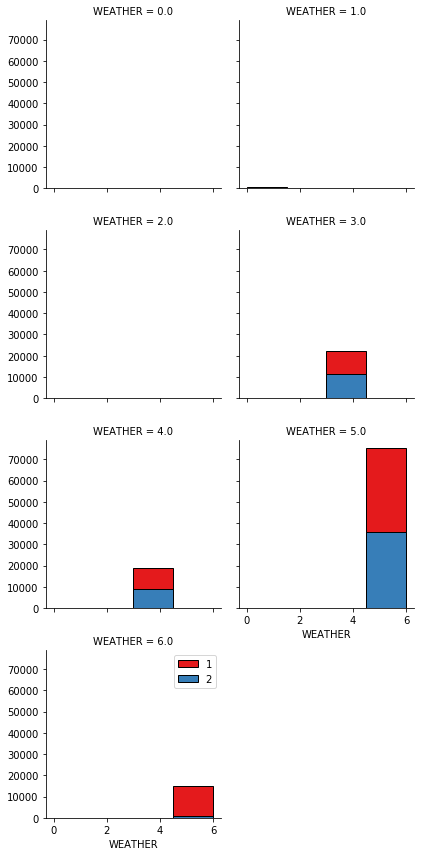

In [90]:
bins = np.linspace(df.WEATHER.min(), df.WEATHER.max(), 5)
g = sns.FacetGrid(df, col="WEATHER", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'WEATHER', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [98]:
df.corr()['SEVERITYCODE'].sort_values() # corr() to find the feature other than SEVERITY CODE that is most correlated with SEVERITY CODE

ROADCOND         -0.123825
WEATHER          -0.076704
LIGHTCOND        -0.063461
VEHCOUNT         -0.054686
SDOTCOLNUM        0.004226
INTKEY            0.006553
X                 0.010309
Y                 0.017737
OBJECTID          0.020131
INCKEY            0.022065
COLDETKEY         0.022079
STATUS            0.030967
UNDERINFL         0.043764
SEGLANEKEY        0.104276
PERSONCOUNT       0.130949
CROSSWALKKEY      0.175093
SDOT_COLCODE      0.188905
PEDCYLCOUNT       0.214218
PEDCOUNT          0.246338
SEVERITYCODE.1    1.000000
SEVERITYCODE      1.000000
Name: SEVERITYCODE, dtype: float64

In [95]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

# Model Development

## linear regression model using the coeffients of attributes

In [106]:
X = df[['SPEEDING']]
Y = df['SEVERITYCODE']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.0015161942597953226

In [113]:
X = df[['WEATHER']]
Y = df['SEVERITYCODE']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.0016838885869083773

In [115]:
X = df[['LIGHTCOND']]
Y = df['SEVERITYCODE']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.0029023916518690074

In [121]:
X = df[['ROADCOND']]
Y = df['SEVERITYCODE']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.014092836412182508

In [123]:
X = df[['UNDERINFL']]
Y = df['SEVERITYCODE']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00196928466153512

In [125]:
X = df[['STATUS']]
Y = df['SEVERITYCODE']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.0009589847521764838

In [129]:
X = df[['ADDRTYPE']]
Y = df['SEVERITYCODE']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.04063198198712703

# R^2(Goodness of Fit )

In [132]:
features =["SPEEDING", "ADDRTYPE","WEATHER" ,"LIGHTCOND" ,"ROADCOND" ,"UNDERINFL" ,"STATUS"]  

In [135]:
X = df[features]
Y= df['SEVERITYCODE']
lm = LinearRegression()
lm.fit(X, Y)
lm.score(X, Y)


0.05904366943404282

In [136]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [137]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [140]:
pipe.fit(X,Y)
pipe.score(X,Y)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.06598823180245306

# Model Evaluation and Refinement

In [141]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [142]:
features =["SPEEDING", "ADDRTYPE","WEATHER" ,"LIGHTCOND" ,"ROADCOND" ,"UNDERINFL" ,"STATUS"]      
X = df[features]
Y = df['SEVERITYCODE']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 29201
number of training samples: 165472


## Ridge regression object 

In [143]:
from sklearn.linear_model import Ridge

In [144]:
RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(x_train, y_train)
RidgeModel.score(x_test, y_test)

0.05621433071175852

## Performing a second order polynomial transform on both the training data and testing data

In [145]:
from sklearn.linear_model import Ridge
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
poly = Ridge(alpha=0.1)
poly.fit(x_train_pr, y_train)
poly.score(x_test_pr, y_test)

0.06205138200865623